# CREDIT CARD CLUSTERING
***



Esse é um projeto de estudo criado a partir do curso **Clustering: extraindo padrões** da Alura.

O projeto tem objetivo de enquadrar os perfis de diferentes clientes na utilização de cartão de crédito através de métodos de clustering.

Primeiramente, realizei todas as importações de bibiliotecas necessárias para o projeto. Em seguida, carreguei os dados. Depois, analisei o DataFrame e removi colunas e preenchi dados faltantes. A seguir, utilizei o algoritmo K-means e meu modelo e logo após busquei validar e comparar meu modelo através dos cálculos Silhouette, Davies-Bouldin e Calinski-Harabasz. Posteriormente, criei uma breve visualização dos clusters e em seguida concluí os perfis dos clientes.

Os dados utilizados foram retirados de https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

## IMPORT
***

In [2]:
#Bibliotecas
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

## LOADING DATA
***

In [9]:
#Carregando os dados
df = pd.read_csv('CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## DATA PREPARATION
***

In [10]:
#Removendo colunas CUST_ID e TENURE
df.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [11]:
#Verificando dados vazios
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [12]:
#Preenchendo os dados vazios com as medianas do Data Frame
df.fillna(df.median(), inplace = True)
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [15]:
#Normalizando os valores
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

## MODEL TRAINING
***

In [16]:
#Aplicando o algoritmo de clustering KMeans
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

## VALIDATION
***

In [18]:
#Criando labels
labels = kmeans.labels_

#Silhouette
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
silhouette


0.3645411627253395

In [19]:
#Davies-Bouldin
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.075244286217181

In [20]:
#Calinski
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.7770705278444

In [24]:
#Definindo uma função para analisar alterações em relação ao número de cluster
def clustering_algorithm(n_clusters, df):
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(df)
  silhouette = metrics.silhouette_score(df, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(df, labels)
  calinski = metrics.calinski_harabasz_score(df, labels)
  return silhouette, dbs, calinski


In [25]:
#Alterando o número de clusters
silhouette1, dbs1, calinski1 = clustering_algorithm(3, values)
silhouette1, dbs1, calinski1

(0.3272203126696238, 1.3096073640088426, 3526.440519908274)

In [26]:
silhouette2, dbs2, calinski2 = clustering_algorithm(5, values)
silhouette2, dbs2, calinski2

(0.3644845919974304, 1.0757138590613295, 3431.7937428414293)

In [27]:
silhouette3, dbs3, calinski3 = clustering_algorithm(50, values)
silhouette3, dbs3, calinski3

(0.25278531594412346, 1.2586013399221119, 1611.1649604082904)

In [30]:
#Aplicando dados aleatórios para validar nossos dados
random_data = np.random.rand(8950, 16)
silhouette, dbs, calinski = clustering_algorithm(5, random_data)
print(silhouette, dbs, calinski)
print(silhouette2, dbs2, calinski2)

0.03988915613007799 3.4770384516552477 303.63121873352594
0.3644845919974304 1.0757138590613295 3431.7937428414293


In [31]:
#Comparando validações
set1, set2, set3 = np.array_split(values, 3)
silhouette1, dbs1, calinski1 = clustering_algorithm(5, set1)
silhouette2, dbs2, calinski2 = clustering_algorithm(5, set2)
silhouette3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(silhouette1, dbs1, calinski1)
print(silhouette2, dbs2, calinski2)
print(silhouette3, dbs3, calinski3)

0.36874828236865986 1.0591408006918441 1204.0557945554897
0.3538037064965953 1.1394936582652302 1194.948634553892
0.3668564117315988 1.0993525253456347 1167.5313082261505


## DATA VISUALIZATION
***

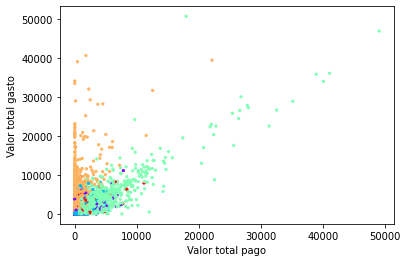

In [32]:
#Gráfico de clusters
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()

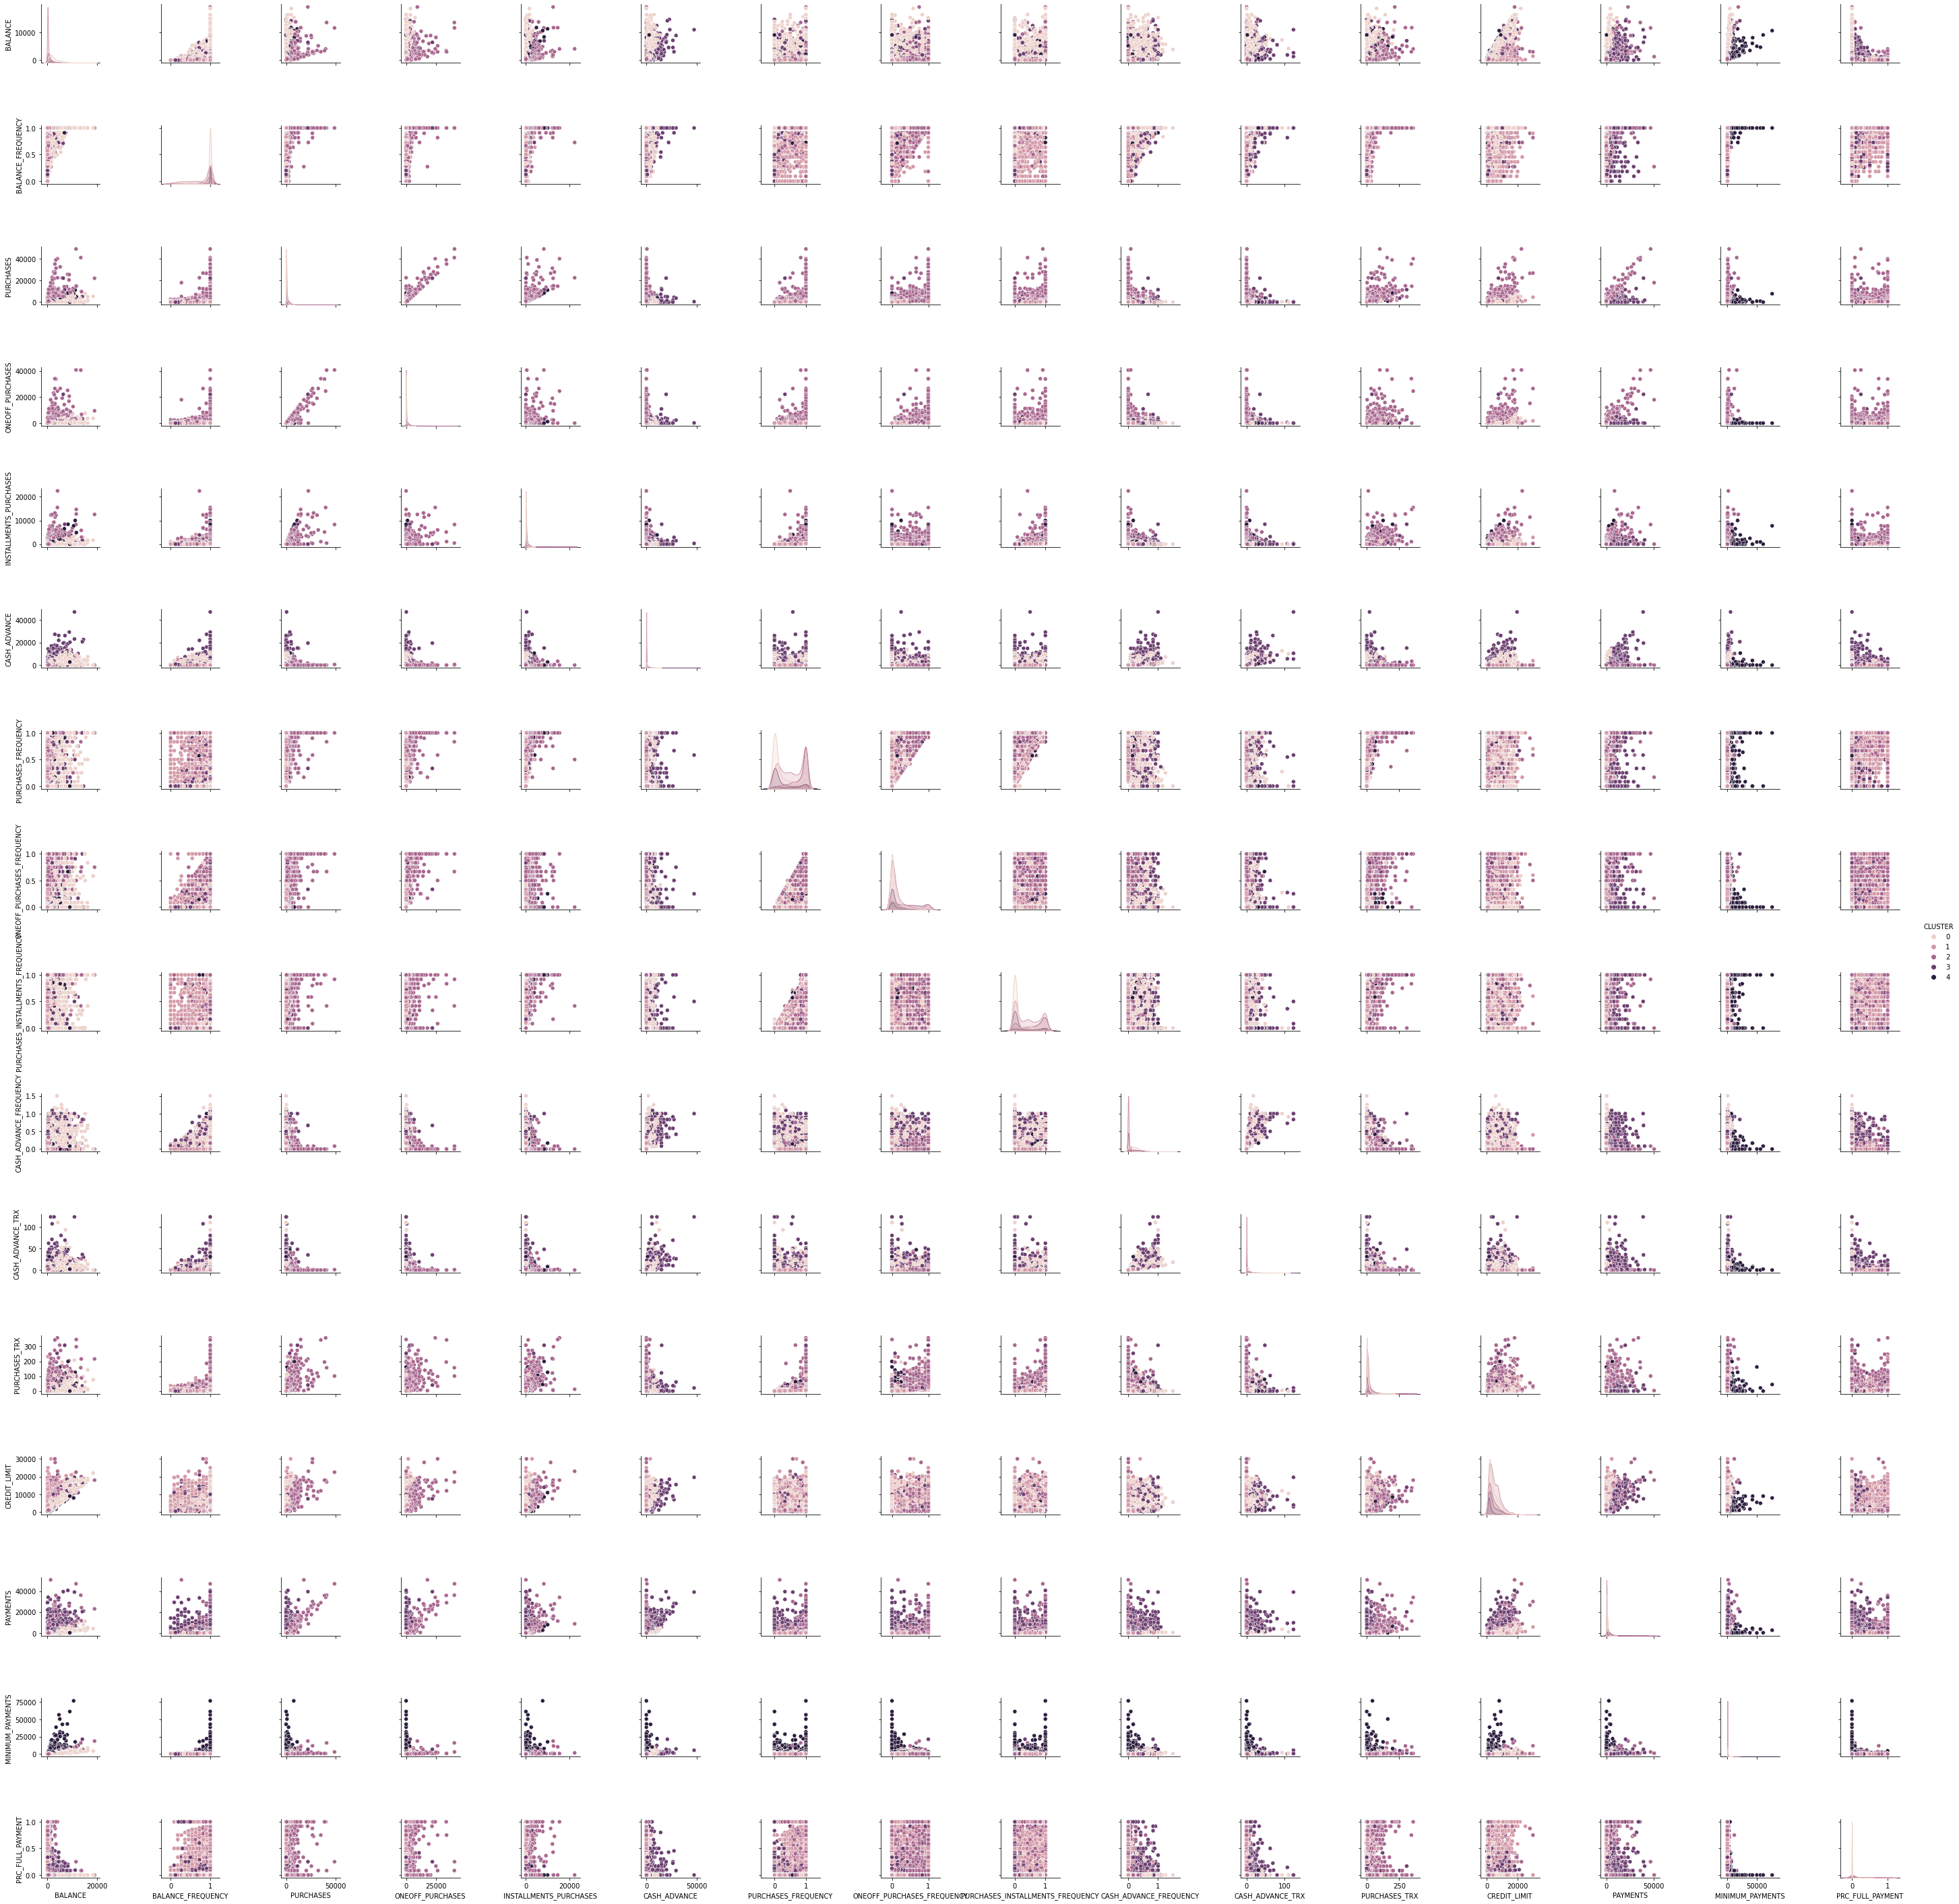

In [33]:
#Pairplot
df['CLUSTER'] = labels
sns.pairplot(df[0:], hue = 'CLUSTER')

In [34]:
#Descrição do Data Frame
df.groupby('CLUSTER').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
CLUSTER                                                             
0        2650.0  3037.418031  2478.384960   6.824905  1259.648589   
1        3279.0   444.049007   846.475044   0.000000    23.340435   
2        1540.0  1142.222657  1664.035755   0.000000   211.566656   
3        1073.0  1794.764536  1982.173844   0.000000   507.076999   
4         408.0  1990.318603  1860.968409  70.794108  1016.567882   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
CLUSTER                                                                       
0        2172.596565  4223.858877  18495.558550            2650.0  0.964036   
1          83.004246   411.938506   9630.367575            3279.0  0.774292   
2         554.332740  1370.859355  19043.138560            1540.0  0.928053   
3        1088.056301  2315.003636  14581.459140            1073.0  0.862156   
4        1326.681742  2149.639085  11670.179850             408.0  0.989409   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
CLUSTER  ...                                                             
0        ...      1330.332500   8345.641905           2650.0  0.001798   
1        ...       248.968369   4483.503862           3279.0  0.246474   
2        ...       524.184580  18621.013310           1540.0  0.278582   
3        ...       886.322345  21235.065300           1073.0  0.117275   
4        ...      7184.162991  76406.207520            408.0  0.019460   

                                                      
              std  min  25%       50%       75%  max  
CLUSTER                                               
0        0.023256  0.0  0.0  0.000000  0.000000  0.6  
1        0.346575  0.0  0.0  0.000000  0.444444  1.0  
2        0.367203  0.0  0.0  0.083333  0.545455  1.0  
3        0.186801  0.0  0.0  0.083333  0.142857  1.0  
4        0.091220  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [35]:
#Centróides
centroids = kmeans.cluster_centers_
centroids

array([[5.04526580e-01, 2.72332745e-04, 6.20171708e-02, 3.64414607e-02,
        2.55974069e-02, 2.52329514e-01, 6.75600478e-05, 2.58663568e-05,
        4.51550497e-05, 5.73437494e-05, 1.15422756e-03, 1.33589087e-03,
        7.18989200e-01, 1.66362861e-01, 1.79601509e-01, 5.51886878e-07],
       [6.91500676e-02, 2.30500918e-04, 1.21249070e-01, 4.80292219e-02,
        7.33201686e-02, 2.45092176e-02, 1.72533528e-04, 3.37037910e-05,
        1.39979258e-04, 7.94785748e-06, 1.25158520e-04, 2.85966076e-03,
        9.43698456e-01, 1.53524115e-01, 5.68259850e-02, 7.57745962e-05],
       [1.59916626e-01, 2.45606202e-04, 4.38055940e-01, 2.56358618e-01,
        1.81868389e-01, 2.57722049e-02, 2.04800071e-04, 8.87919716e-05,
        1.51142261e-04, 9.35689254e-06, 1.69241191e-04, 6.16977879e-03,
        6.04298517e-01, 4.02511286e-01, 8.56160916e-02, 7.26174325e-05],
       [2.35317569e-01, 2.16489198e-04, 6.04496610e-02, 3.43849416e-02,
        2.60699292e-02, 4.00329698e-01, 5.27098698e-05, 2.046

In [36]:
#Variância dos atributos
max = len(centroids[0])
for i in range(max):
  print(df.columns.values[i], '\n{:.4f}'.format(centroids[:,i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0362
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0549
PRC_FULL_PAYMENT 
0.0000


## CONCLUSION
***

Nosso modelo apresentou 5 clusters, cada um com as seguintes características:

**CLUSTER 0:** Clientes que gastam muito com compras. Melhores pagadores.

**CLUSTER 1:** Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

**CLUSTER 2:** Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

**CLUSTER 3:** Clientes que gastam muito com saques. Pagam as vezes.

**CLUSTER 4:** Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

In [37]:
#Descrição
description = df.groupby('CLUSTER')["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
CLUSTER,,,,,,
0,3037.418031,385.387785,1633.738761,4492.924528,968.661814,2650
1,444.049007,629.261351,142.448152,5132.905388,814.307226,3279
2,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
3,1794.764536,475.785508,3270.705696,3975.462453,4706.788521,1073
4,1990.318603,856.504755,424.225892,2231.985294,1340.280120,408


In [38]:
#Pagadores
df.groupby('CLUSTER')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
CLUSTER,,,,,,,,
0,2650.0,0.001798,0.023256,0.0,0.0,0.000000,0.000000,0.6
1,3279.0,0.246474,0.346575,0.0,0.0,0.000000,0.444444,1.0
2,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0
3,1073.0,0.117275,0.186801,0.0,0.0,0.083333,0.142857,1.0
4,408.0,0.019460,0.091220,0.0,0.0,0.000000,0.000000,1.0
